# `Python` в науке и инженерии

## Домашнее задание 3. `Scipy`

Правила выполнения работы:

- Решение каждой задачи должно располагаться в **ячейке типа "Код" под ячейкой с условием задачи**
- **Результат** каждой задачи должен быть **выведен на экран**
- **Запрещено** изменять ячейки с условиями задач каким-либо образом и перемещать их
- Все задачи должны быть решены с использованием **векторизации**
- Если в условии задачи не сказано иное, **не допускается** применение циклов `for`, `while`, генераторов списков и любых других циклов и их заменителей, не входящих в `numpy`
- **В квадратных скобках** в конце условия задачи указано **количество баллов** за корректное выполнение этой задачи


Полезные документы:

- [Numpy Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)
- [Scientific Python Lectures / Numpy](https://github.com/jrjohansson/scientific-python-lectures/blob/master/Lecture-2-Numpy.ipynb)
- [Matplotlib Cheat Sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

**1. Импортировать: [5]**

- модуль `numpy` под именем `np`

- подмодуль `pyplot` из модуля `matplotlib` под именем `plt`

- из модуля `scipy.interpolate` функции `interp1d`, `InterpolatedUnivariateSpline`

- из модуля `scipy.optimize` функции `root`, `minimize`

- из модуля `scipy.integrate` функции `solve_ivp`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline
from scipy.optimize import root, minimize
from scipy.integrate import solve_ivp


**2. Построить интерполяционные сплайны 1, 2, 3 степеней для функции, заданной таблично. Изобразить исходную функцию точками, а построенные сплайны линиями разных цветов на одном рисунке; подписать каждую линию и вывести легенду. [10]**

`x    = [0.    ,  0.007,  0.014,  0.021,  0.028,  0.035,  0.042,  0.049]`

`f(x) = [68.041, 37.183, 55.324, 47.556, -0.739, 48.188, 59.159, 19.636]`



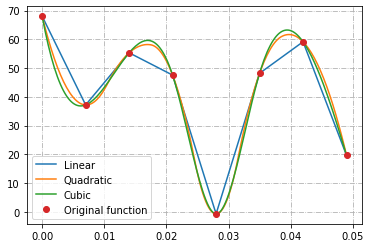

In [13]:
def func(x1, a):
    global x, fx
    tck  = interp1d(x, fx,kind = a)
    return tck(x1)


x = [0.    ,  0.007,  0.014,  0.021,  0.028,  0.035,  0.042,  0.049]
fx = [68.041, 37.183, 55.324, 47.556, -0.739, 48.188, 59.159, 19.636]


x1 = np.linspace(x[0], x[-1], 200)

plt.plot(x1, func(x1, 'linear'), label='Linear')
plt.plot(x1, func(x1, 'quadratic'), label='Quadratic')
plt.plot(x1, func(x1, 'cubic'), label='Cubic')
plt.plot(x, fx, 'o', label='Original function')
plt.grid(ls='-.')
plt.legend()
plt.draw()


**3. Кривая на плоскости задана таблично (массивом точек) в файле `curve.txt`. Построить сплайн 3 порядка и изобразить его на рисунке вместе с исходными точками. [10]**

Для построения сплайна рекомендуется преобразовать координаты кривой в полярную систему координат.

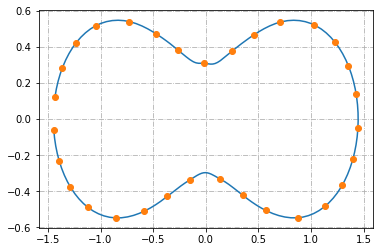

In [14]:
def spline(x, y, x1, a):
    b  = interp1d(x, y ,kind = a)
    return b(x1)


def norm(arr):
    x1 = np.linspace(arr[0, 0], arr[-1, 0], 200)
    y = spline(arr[:, 0], arr[:, 1], x1, 'cubic')
    newy = y * np.sin(x1)
    x = y * np.cos(x1) 
    return (x, newy)


def polar(x):
    rho = np.sqrt(x[:, 0]**2 + x[:, 1]**2)
    phi = np.arctan2(x[:, 1], x[:, 0]) 
    return(phi, rho)


arr = np.loadtxt('curve.txt')
polarr = np.array(polar(arr)).transpose()
polarr = polarr[polarr[:, 0].argsort()] 


plotspline = np.array(norm(polarr)).transpose()


plt.plot(plotspline[:, 0], plotspline[:, 1])
plt.plot(arr[:, 0], arr[:, 1], 'o')
plt.grid(ls='-.')
plt.draw()


**4. Найти все корни и экстремумы функции $f(x) = \log(x) \cdot \cos(x)$ на отрезке $[1, 20]$. Построить график функции и отметить на нем найденные корни и экстремумы [10]**


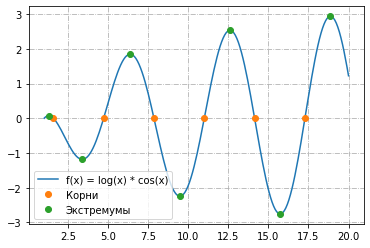

In [15]:
def func(x):
    return np.log(x)*np.cos(x)

x = np.linspace(1, 20, 200)
a = InterpolatedUnivariateSpline(x, func(x), k=3)
b = InterpolatedUnivariateSpline(x, func(x), k=4).derivative()
roots = a.roots()
extremums = b.roots()

plt.plot(x, func(x), label="f(x) = log(x) * cos(x)")
plt.plot(roots, func(roots), 'o', label="Корни")
plt.plot(extremums, func(extremums), 'o', label="Экстремумы")
plt.grid(ls='-.')
plt.legend()
plt.draw()

**5. Найти все корни и экстремумы периодической функции, заданной параметрически (кривая в трехмерном пространстве); изобразить трехмерный график функции и отметить на нем корни и экстремумы [15]**

Параметрическое задание функции:

$x = \cos(t)$

$y = \sin(t)$

$z = \cos(4t) \cdot \sin(2t)$

Корни функции задаются уравнением $z = 0$



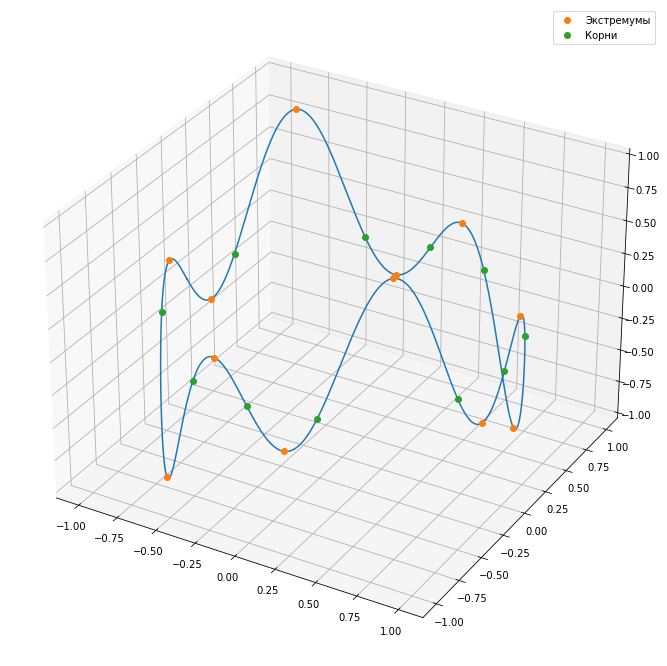

In [16]:
from mpl_toolkits.mplot3d import Axes3D

t = np.linspace(-np.pi, np.pi, 1000)
x = np.cos(t)
y = np.sin(t)
z = np.cos(4 * t) * np.sin(2 * t)


pl = plt.figure(figsize=(12,12)).add_subplot(projection='3d')
pl.plot(x, y, z)

extremums = InterpolatedUnivariateSpline(t, z, k=4).derivative().roots() 
pl.plot(np.cos(extremums), np.sin(extremums), np.cos(4 * extremums) * np.sin(2 * extremums), 'o', label='Экстремумы')


roots = InterpolatedUnivariateSpline(t, z, k=3).roots()
pl.plot(np.cos(roots), np.sin(roots), np.cos(4 * roots) * np.sin(2 * roots), 'o', label='Корни')


pl.legend()
plt.draw()

**6. Построить 10 фазовых траекторий $\dot x(x), \dot y(y)$, а также зависимостей $y(x)$ для задачи "хищник-жертва"; подписать оси [15]**

Задача "хищник-жертва" описывается моделью Лотки-Вольтерры:

$\dot x = \alpha x - \beta x y$

$\dot y = \delta x y - \gamma y$

где $x$ - количество жертв, $y$ - количество хищников.

Параметры модели взять следующими: $\alpha = 2/3, \beta = 4/3, \gamma = \delta = 1$

Начальные условия взять на линии $y = x$ на отрезке $[0.1, 1.1]$.

Отрезок интегрирования $t \in [0, 15]$.

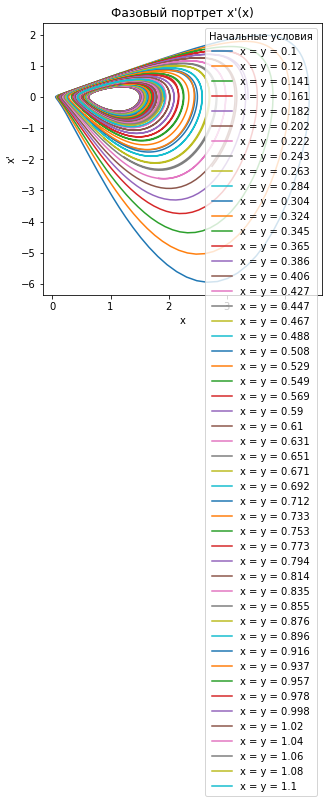

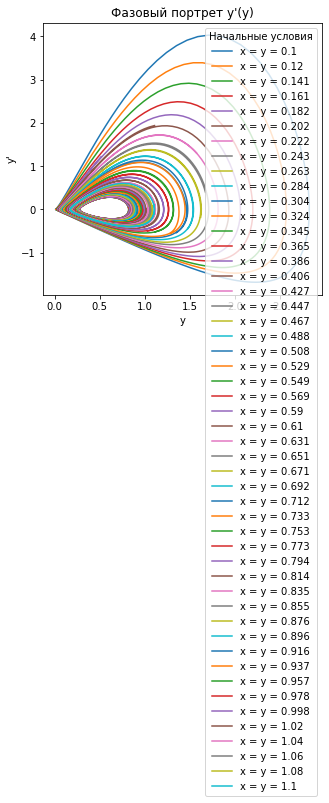

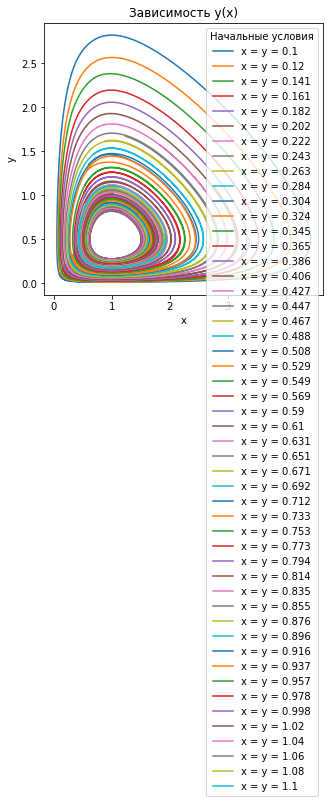

In [17]:
a = 2/3 
b = 4/3 
c = 1   
d = 1   

x = np.linspace(0.1, 1.1, 50)



def lotkavolt(t, z):
    global a, b, c, d
    x, y = z[0], z[1]
    return [(a - b * y) * x, (d * x - c) * y]


def solves(x):
    lv = solve_ivp(lotkavolt, [0, 15], [x, x], dense_output=True)
    t = np.linspace(0, 15, 500)
    return np.array(lv.sol(t).T) 


plt.figure(figsize=(5,5))
for i in range(len(x)):
    z = solves(x[i])
    plt.plot(z[:, 0], (a - b * z[:, 1]) * z[:, 0], label='x = y = {:.3}'.format(x[i]))
plt.xlabel('x')
plt.ylabel("x'")
plt.title("Фазовый портрет x'(x)")
plt.legend(title="Начальные условия")
plt.show()


plt.figure(figsize=(5,5))
for i in range(len(x)):
    z = solves(x[i])
    plt.plot(z[:, 1], (d * z[:, 0] - c) * z[:, 1], label='x = y = {:.3}'.format(x[i]))
plt.xlabel('y')
plt.ylabel("y'")
plt.title("Фазовый портрет y'(y)")
plt.legend(title="Начальные условия")
plt.show()


plt.figure(figsize=(5,5))
for i in range(len(x)):
    z = solves(x[i])
    plt.plot(z[:, 0], z[:, 1], label='x = y = {:.3}'.format(x[i]))

plt.xlabel('x')
plt.ylabel("y")
plt.title("Зависимость y(x)")
plt.legend(title="Начальные условия")
plt.draw()

**7. Рассчитать и построить график зависимости периода колебаний математического маятника от начальной скорости на полуинтервале (2, 10] [15]**

В этой задаче разрешается использовать один цикл `python`.

Уравнения движения (ОДУ) математического маятника:

$\dot \theta = \omega$

$\dot \omega = - \sin(\theta)$

Способ решения задачи:
- взять 100 значений $\omega_0 \in (2, 10]$
- для каждого вектора состояния (0, $\omega_0$) проинтегировать ОДУ на отрезке времени $t \in [0, 2 \pi]$
- по полученной таблично функции $\theta(t)$ построить сплайн для $\theta(t) - 2 \pi$ и найти его корень $T$
- нарисовать график $T(\omega_0)$ 

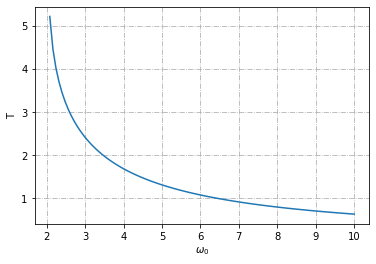

In [34]:
omega0 = np.linspace(2, 10, 101)[1:]


def func(t, s):
    a = np.empty_like(s)
    theta, omega = s
    a[0] = omega
    a[1] = -np.sin(theta)
    return a


def solves(x):
    t = np.linspace(0, 2*np.pi, 1000)
    sol = solve_ivp(func, 
                [0, 2*np.pi],
                [0, x], 
                method='DOP853', 
                max_step=0.1,
                rtol=1e-12, 
                atol=1e-12,  
                dense_output=True
                )
    return np.array(sol.sol(t).T)[:, 1]

t = np.linspace(0, 2*np.pi, 1000)


T = []

for omega in omega0:
    z = solves(omega) 
    s = InterpolatedUnivariateSpline(t, z, k=4).derivative().roots()
    period = (s[1] - s[0]) * 2
    T.append(period)

plt.plot(omega0, T)
plt.xlabel(r"$\omega_0$")
plt.ylabel("T")
plt.grid(ls='-.')
plt.draw()

**8. Нарисовать график зависимости изменения размера капли от времени и рассчитать период колебаний капли [20]**

В этой задаче разрешается использовать один цикл `python`.

Капля жидкости, находящаяся в другой жидкости, в начальный момент времени имеет форму эллипсоида. Под действием силы поверхностного натяжения капля стремится принять форму сферы, вследствие чего возникают колебания поверхности капли. Период таких колебаний и требуется найти.

В файле `drops.txt` хранятся срезы расчетной области. Каждая строка файла отвечает своему моменту времени $t_i = 0, 1, 2, ...$ и хранит значения плотности жидкости капли $\rho_i(x)$ для $x\in[0,250]$. Границей капли считаются такие значения $x^i_{1,2}$, при которых $\rho_i(x^i_{1,2})=0.5$ (см. рисунок).

![drop.png](drop.png)


Способ решения задачи:

- для каждого момента времени $t_i$ найти границы капли, т.е. получить корни $x^i_{1,2}$ функции $\rho_i(x)-0.5=0$
- рассчитать размер капли $dx(t_i) = x^i_2 - x^i_1$
- найти период колебаний размера капли, т.е. удвоенное расстояние между первыми двумя экстремумами функции $dx(t_i)$


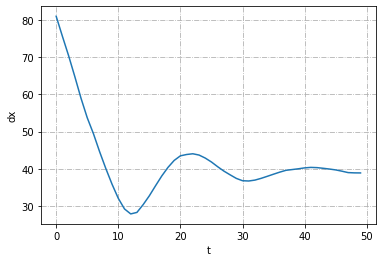

In [35]:
drop = np.loadtxt('drop.txt')
dx = []

for i in range(len(drop)):
    x = InterpolatedUnivariateSpline(range(len(drop[0])), drop[i] - 0.5, k=3).roots()
    dx.append(x[1] - x[0])


plt.plot(range(50), dx)
plt.xlabel('t')
plt.ylabel('dx')

ext = InterpolatedUnivariateSpline(range(50), dx, k=4).derivative().roots()
t = (ext[1] - ext[0]) * 2
plt.grid(ls='-.')
plt.draw()
print()